In [24]:
# Preprocess audio and remove some of the noise where possible
import os
import numpy as np
import pandas as pd
import librosa # Fixed the numba.decorators import error by modifying /util/decorators.py to numba.core.decorators
import matplotlib.pyplot as plt
from IPython.display import Audio
audio_dir = os.getcwd()+"\\audio_full\\"

In [5]:
# Get a list of files in the folder
files = os.listdir(audio_dir)
bird_data = pd.read_csv('bird_recordings_general.csv')
bird_data['Species'] = bird_data['gen']+" "+bird_data['sp']
class_labels = np.asarray(pd.value_counts(bird_data['Species']).axes[0])

In [87]:
df = pd.DataFrame()
vc = pd.value_counts(bird_data['Species'])
df['Species'] = vc.index
df['FileCount'] = vc.values
df = df.sort_values('Species')
df.reset_index(inplace=True)
df = df.drop('index', axis=1)

In [94]:
englishNames = []
for sp in sorted(set(df['Species'])):
    englishNames.append(bird_data['en'][bird_data['Species'] == sp].iloc[0])

englishNames

['Common Redpoll',
 'Arctic Redpoll',
 "Cooper's Hawk",
 'Northern Goshawk',
 'Sharp-shinned Hawk',
 'Common Myna',
 'Millerbird',
 'Saipan Reed Warbler',
 'Spotted Sandpiper',
 "Clark's Grebe",
 'Western Grebe',
 'Northern Saw-whet Owl',
 'Boreal Owl',
 'White-throated Swift',
 'Crested Auklet',
 'Parakeet Auklet',
 'Least Auklet',
 'Whiskered Auklet',
 'Rosy-faced Lovebird',
 'Red-winged Blackbird',
 'Tricolored Blackbird',
 'Rufous-crowned Sparrow',
 'Wood Duck',
 'Eurasian Skylark',
 'Chukar Partridge',
 'Egyptian Goose',
 'Red Avadavat',
 'Berylline Hummingbird',
 'Violet-crowned Hummingbird',
 'Buff-bellied Hummingbird',
 'Orange-winged Amazon',
 'Lilac-crowned Amazon',
 'Yellow-headed Amazon',
 'Red-crowned Amazon',
 "Baird's Sparrow",
 'Saltmarsh Sparrow',
 "Henslow's Sparrow",
 "LeConte's Sparrow",
 'Seaside Sparrow',
 "Nelson's Sparrow",
 'Grasshopper Sparrow',
 'Black-throated Sparrow',
 'Five-striped Sparrow',
 'Northern Pintail',
 'Green-winged Teal',
 'Eurasian Teal',
 'M

In [95]:
df['EnglishName'] = englishNames

In [96]:
df['TotalTime'] = bird_data.groupby(bird_data['Species'])['rec_length'].sum().values

In [97]:
# 461 hours of audio total...
np.sum(df['TotalTime'])/(60*60)

461.6744444444444

In [109]:
# If I narrow it down to birds which have at least 2 hours of recordings, that leaves 40 species.
df.sort_values('TotalTime', ascending=False).head(50)

,Species,FileCount,EnglishName,TotalTime
429,Melospiza melodia,493,Song Sparrow,21075
543,Pipilo maculatus,388,Spotted Towhee,17897
169,Cardinalis cardinalis,401,Northern Cardinal,17205
713,Thryothorus ludovicianus,385,Carolina Wren,15087
730,Troglodytes aedon,336,House Wren,14819
711,Thryomanes bewickii,331,Bewick's Wren,14682
735,Turdus migratorius,318,American Robin,14612
19,Agelaius phoeniceus,320,Red-winged Blackbird,13849
399,Loxia curvirostra,440,Red Crossbill,13714
351,Junco hyemalis,317,Dark-eyed Junco,13074


In [107]:
df.sort_values('FileCount', ascending=False)

,Species,FileCount,EnglishName,TotalTime
429,Melospiza melodia,493,Song Sparrow,21075
399,Loxia curvirostra,440,Red Crossbill,13714
169,Cardinalis cardinalis,401,Northern Cardinal,17205
543,Pipilo maculatus,388,Spotted Towhee,17897
713,Thryothorus ludovicianus,385,Carolina Wren,15087
730,Troglodytes aedon,336,House Wren,14819
711,Thryomanes bewickii,331,Bewick's Wren,14682
19,Agelaius phoeniceus,320,Red-winged Blackbird,13849
735,Turdus migratorius,318,American Robin,14612
351,Junco hyemalis,317,Dark-eyed Junco,13074


In [108]:
np.sum(df['FileCount'])

40857

In [ ]:
for i in range(10): # len(files)
    print('File', i)
    id_num = int(files[i][:-4])
    label = bird_data[bird_data['id']==id_num]['Species'].iloc[0]
    print(label)
    samples, sample_rate = librosa.load(audio_dir+files[i], sr=None)

In [ ]:
def denoise(file):
    # read file
    # compute FFT
    # remove noise parts
    # compute inverse FFT
    # write file

In [93]:
samples, sample_rate = librosa.load(audio_dir+files[0], sr=None)

C:\Anaconda3\lib\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


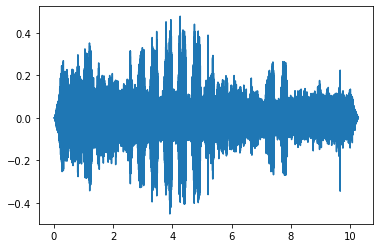

In [151]:
# Visually there are some places with lower signal and more noise...
dt = 1.0/sample_rate
t = np.arange(0, len(samples)/sample_rate, dt)
plt.plot(t, samples)

In [10]:
n = len(samples)
fhat = np.fft.fft(samples, n)
PSD = fhat*np.conj(fhat)/n

C:\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


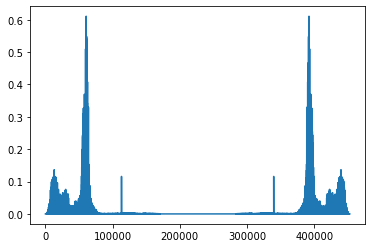

In [13]:
plt.plot(PSD)

In [16]:
freq = (1/(dt*n)) * np.arange(n)
L = np.arange(1, np.floor(n/2), dtype='int')

C:\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


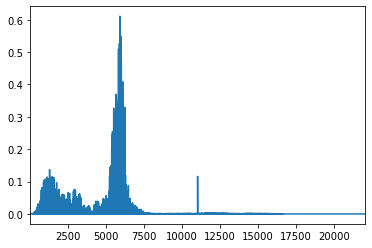

In [19]:
plt.plot(freq[L], PSD[L])
plt.xlim(freq[L[0]], freq[L[-1]])
plt.show()

In [152]:
indices = PSD > max(PSD)/20 # More than 5% the max energy? Conservative filtering, hopefully...
PSDclean = PSD * indices
fhat = indices * fhat
ffilt = np.fft.ifft(fhat)

C:\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


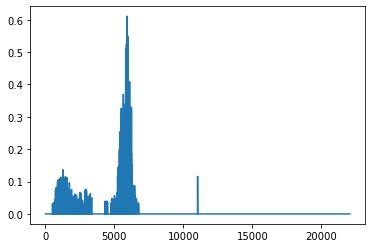

In [153]:
# That remaining peak past 10 kHz is the actual noise that needs to be removed... 
# The distribution of it seems to be like a sharp peak. I don't know if I can use that to my advantage.
plt.plot(freq[L], PSDclean[L])

C:\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


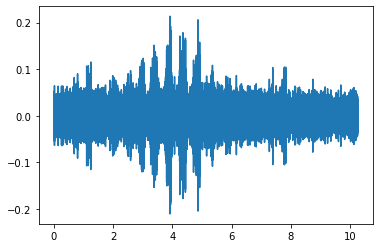

In [154]:
plt.plot(t, ffilt)

In [155]:
# This audio is pretty bad quality anyway, huh?
Audio(samples, rate=sample_rate)

In [156]:
Audio(ffilt, rate=sample_rate)

C:\Anaconda3\lib\site-packages\IPython\lib\display.py:157: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


In [144]:
# The problem with this denoising method is that it assumes a constant signal, which we don't have.
# Another significant problem is that it cuts out some of the lower frequencies
# which do contribute to the signal but which have less energy
# Instead, let's use the spectrogram again

# Borrowed
def spectrogram(samples, sample_rate, stride_ms = 10, 
                          window_ms = 20.0, max_freq = None, eps = 1e-14):
    
    stride_size = int(0.001 * sample_rate * stride_ms)
    window_size = int(0.001 * sample_rate * window_ms)
    
    # Extract strided windows
    truncate_size = (len(samples) - window_size) % stride_size
    samples = samples[:len(samples) - truncate_size]
    nshape = (window_size, (len(samples) - window_size) // stride_size + 1)
    nstrides = (samples.strides[0], samples.strides[0] * stride_size)
    windows = np.lib.stride_tricks.as_strided(samples, 
                                          shape = nshape, strides = nstrides)
    
    assert np.all(windows[:, 1] == samples[stride_size:(stride_size + window_size)])
    
    if max_freq is None:
        max_freq = sample_rate/2
    
    # Window weighting, squared Fast Fourier Transform (fft), scaling
    weighting = np.hanning(window_size)[:, None]
    
    fft = np.fft.rfft(windows * weighting, axis=0)
    fft = np.absolute(fft)
    fft = fft**2
    
    scale = np.sum(weighting**2) * sample_rate
    fft[1:-1, :] *= (2.0 / scale)
    fft[(0, -1), :] /= scale
    
    # Prepare fft frequency list
    freqs = float(sample_rate) / window_size * np.arange(fft.shape[0])
    
    # Compute spectrogram feature
    ind = np.where(freqs <= max_freq)[0][-1] + 1
    
    specgram = np.log(fft[:ind, :] + eps)
    return specgram

44100

In [145]:
spec = spectrogram(samples, sample_rate)

In [146]:
spec.shape

(442, 1025)

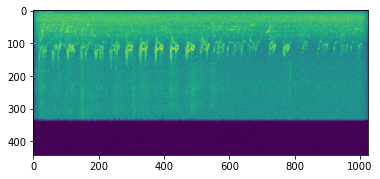

In [147]:
plt.imshow(spec)

In [149]:
means = np.mean(spec, axis=1)
stds = np.std(spec, axis=1)

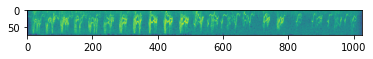

In [150]:
plt.imshow(spec[stds>np.max(stds)*0.5,:])

In [ ]:
# Not sure whether this is any better for filtering...